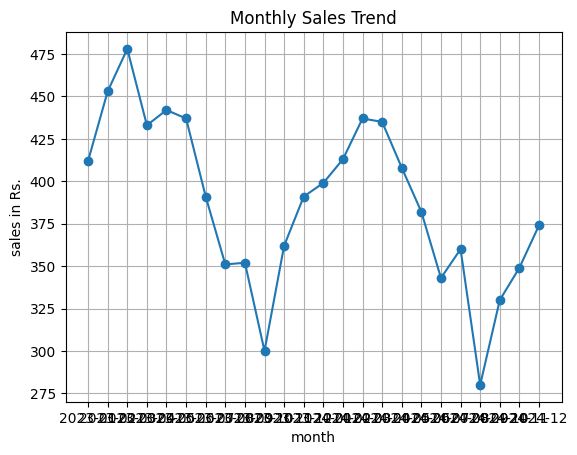

In [6]:
!pip install pandas matplotlib scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df=pd.read_csv("sales_data.csv")
plt.plot(df['month'],df['sales_units'],marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("month")
plt.ylabel("sales in Rs.")
plt.grid(True)
plt.show()
x_analysis=df[['month']]
y_analysis=df['sales_units']



R²: 0.815
MAE: 16.02
MSE: 295.67 | RMSE: 295.67
MAPE: 4.54% | Approx. Accuracy (1 - MAPE): 95.46%
Intercept: 191.27011992182503
avg_list_price_k: -16.08
marketing_spend_k: 2.20
interest_rate_pct: 20.32
fuel_price_index: 2.67
promo_flag: 30.72


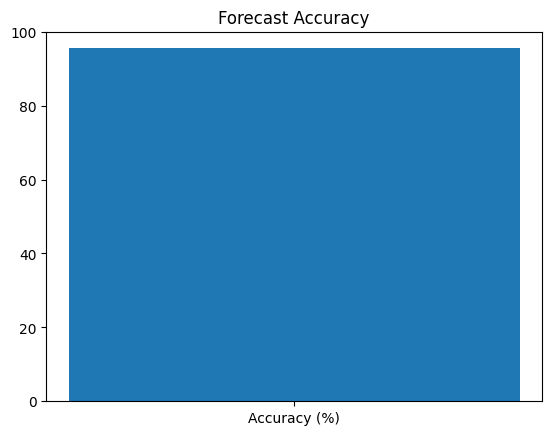

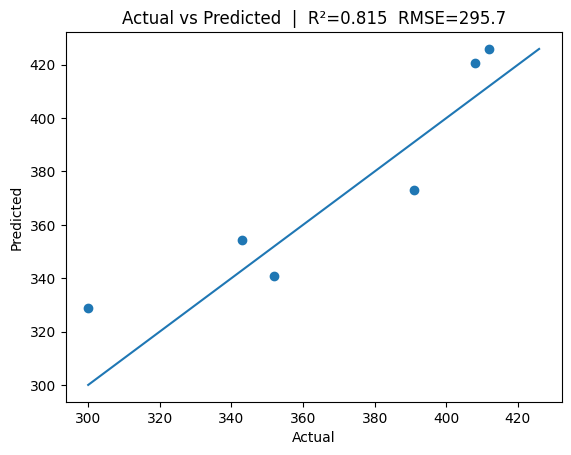

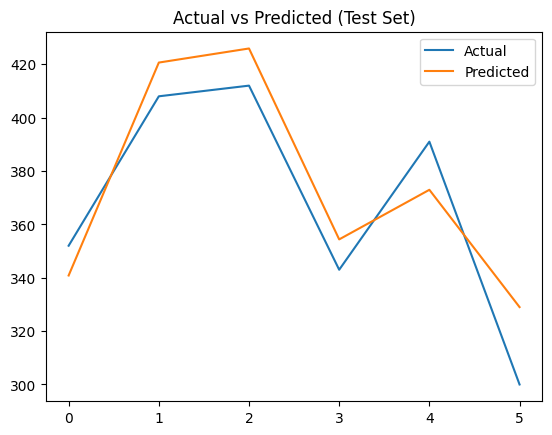

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

X = df[["avg_list_price_k","marketing_spend_k","interest_rate_pct","fuel_price_index","promo_flag"]]
y = df["sales_units"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
mape_pct = mean_absolute_percentage_error(y_test, y_pred) * 100
approx_accuracy = max(0.0, 100.0 - mape_pct)

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f} | RMSE: {rmse:.2f}")
print(f"MAPE: {mape_pct:.2f}% | Approx. Accuracy (1 - MAPE): {approx_accuracy:.2f}%")

print("Intercept:", model.intercept_)
for name, coef in zip(x_train.columns, model.coef_):
    print(f"{name}: {coef:.2f}")
plt.figure()
plt.bar(["Accuracy (%)"], [approx_accuracy])
plt.ylim(0, 100)
plt.title("Forecast Accuracy")
plt.show()

# --- 2) Actual vs Predicted (scatter) ---
yt = np.asarray(y_test)
yp = np.asarray(y_pred)
plt.figure()
plt.scatter(yt, yp)
mn, mx = float(min(yt.min(), yp.min())), float(max(yt.max(), yp.max()))
plt.plot([mn, mx], [mn, mx])  # 45° line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted  |  R²={r2:.3f}  RMSE={rmse:.1f}")
plt.show()

# --- 3) Line plot: Actual vs Predicted over test index ---
plt.figure()
plt.plot(yt, label="Actual")
plt.plot(yp, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted (Test Set)")
plt.show()